# Part II - (Ford GoBike System Data)
## by Osama Badr

## Investigation Overview


> Mainly riders seem to have rides for short rides around about five minutes.
> Female Customer tends to have duration in the rides more than the other genders and types combinations.
> The peak hours in the start hours of the day at 8 A.M  also seems to be after the working hours at 5 P.M 


## Dataset Overview

> Biking sharing system provided by Ford for the area of San Francisco Bay with information about the person, stations, time and duration of the ride. 
> 174952 rows of indvidual rides with 16 features. Several info about the persona demography or details about travel start and end points.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bikes = pd.read_csv('bikes_master.csv')

In [3]:
# Make function that replace title, label and title
def plot_info (title,x_label,y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

## Duration Distribution

> The distribution seems that it is right skewed, the most frequent value is about five minutes, so the bikes seems it is used mainly for short rides.

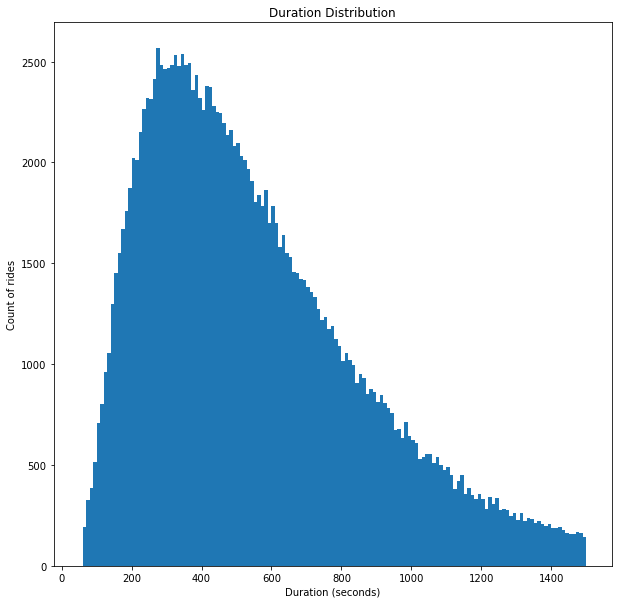

In [4]:
# Exploring the duration distribution
plt.figure(figsize = [10, 10])
base_color = sb.color_palette()[0]
binsize = 10
bins = np.arange(50, df_bikes['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_bikes, x = 'duration_sec', bins=bins, color = base_color)
plot_info('Duration Distribution','Duration (seconds)','Count of rides');

## Total rides accross the day with respect to gender

> The pattern is the same for the male and female
> The peak hours in the start hours of the day at 8 A.M  also seems to be after the working hours at 5 P.M 

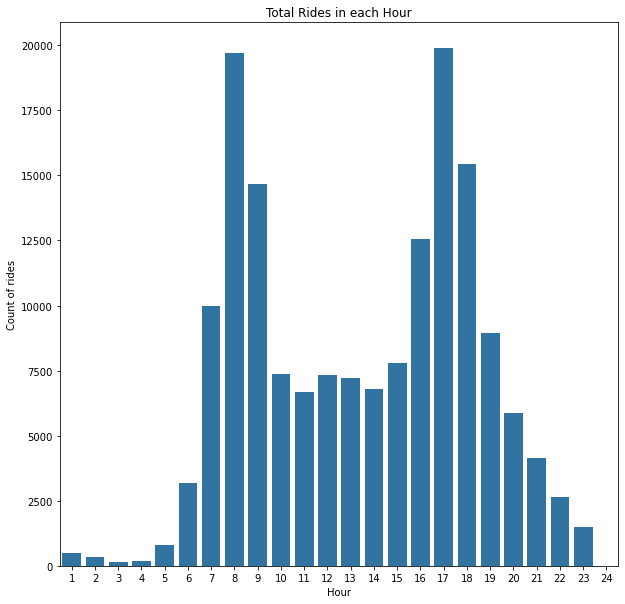

In [5]:
# Plotting the days with count of rides each hour
plt.figure(figsize = [10, 10]);
hour = np.arange(1,25)
sb.countplot(data=df_bikes, x='hour', order=hour, color=base_color);
plot_info('Total Rides in each Hour','Hour','Count of rides');

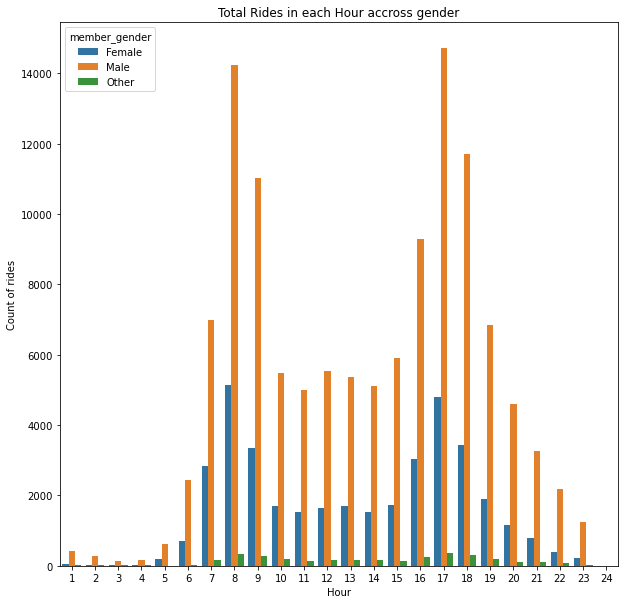

In [6]:
# Plotting the days with count of rides each hour for each gender
hour = np.arange(1,25)
plt.figure(figsize=(10,10))
sb.countplot(data=df_bikes, x='hour', order=hour, hue = 'member_gender');
plot_info('Total Rides in each Hour accross gender','Hour','Count of rides');

## Duration Distribution accross the gender and user type

> The distribution seems that it is right skewed for both male and female but for males it seems the curve is more right skewed so it is shown that the males usually spend more time in the spend relative to females.
> The distribution seems that it is right skewed for both customer and subscriber but for subscriber it seems the curve is high right skewed so it is shown that the subscriber usually spend more time in the spend relative to Customer.

> Female Customer tends to have duration in the rides more than the other genders and types combinations.
> Male Subscriber tends to have duration in the rides less than the other genders and types combinations.

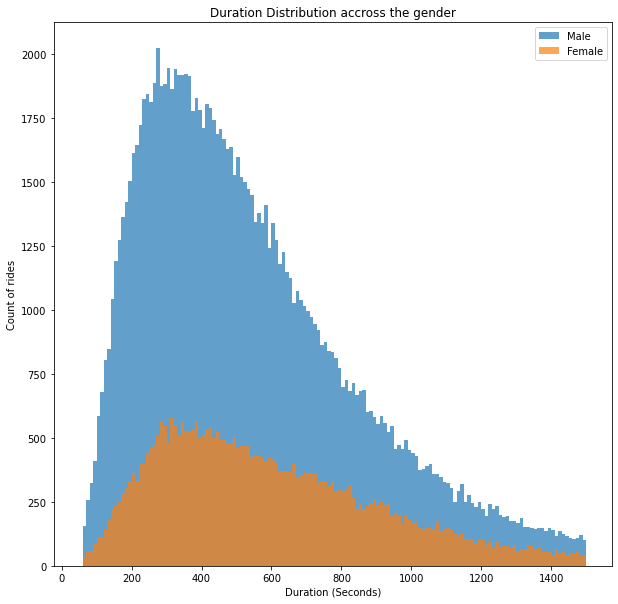

In [7]:
# Exploring the duration distribution
plt.figure(figsize = [10, 10]);
binsize = 10
bins = np.arange(50, df_bikes['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_bikes[df_bikes['member_gender'] == 'Male'], x = 'duration_sec', bins=bins, color = base_color,alpha=0.7,label = 'Male')
plt.hist(data = df_bikes[df_bikes['member_gender'] == 'Female'], x = 'duration_sec', bins=bins, color =sb.color_palette()[1],alpha=0.7 , label = 'Female')
plt.legend();
plot_info('Duration Distribution accross the gender','Duration (Seconds)','Count of rides');

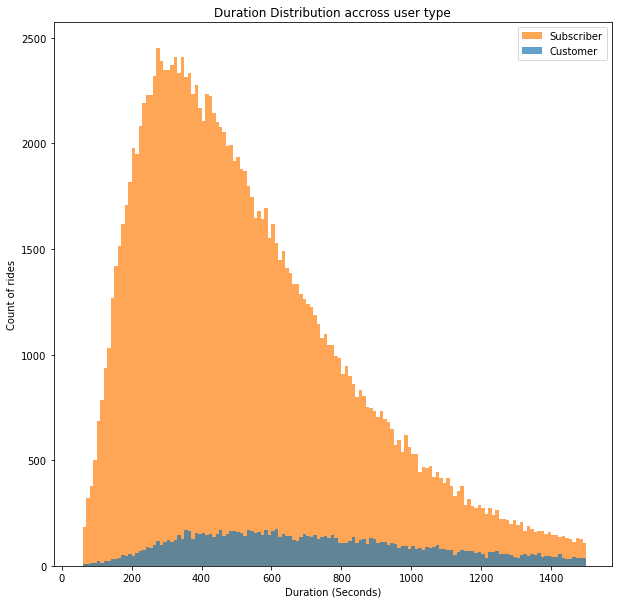

In [8]:
# Exploring the duration distribution
plt.figure(figsize = [10, 10]);
binsize = 10
bins = np.arange(50, df_bikes['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_bikes[df_bikes['user_type'] == 'Subscriber'], x = 'duration_sec', bins=bins, color =sb.color_palette()[1],alpha=0.7 , label = 'Subscriber')
plt.hist(data = df_bikes[df_bikes['user_type'] == 'Customer'], x = 'duration_sec', bins=bins, color = base_color,alpha=0.7,label = 'Customer')
plt.legend();
plot_info('Duration Distribution accross user type','Duration (Seconds)','Count of rides');

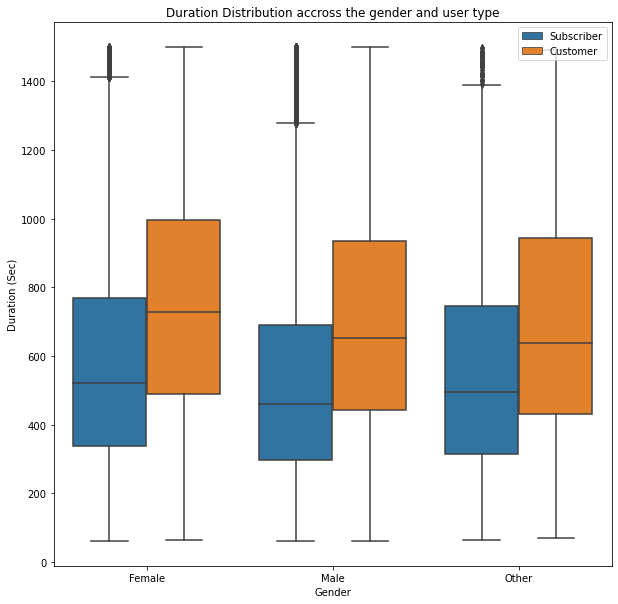

In [9]:
# Plotting box plot diagram for the distribution of the duration between gender and user
plt.figure(figsize = [10, 10])
sb.boxplot(data = df_bikes, y = 'duration_sec', hue = 'user_type',x = 'member_gender')
plt.legend(loc='upper right');
plot_info('Duration Distribution accross the gender and user type','Gender','Duration (Sec)');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Osama_Badr.ipynb --to slides --post serve --no-input --no-prompt